# Deep Neural Network for MNIST Classification

#### Import the relevant packages

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#### Fetch Data

In [2]:
# get data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# check rawdata
print('traint data\t', x_train.shape)
print('test data\t', x_test.shape)

traint data	 (60000, 28, 28)
test data	 (10000, 28, 28)


#### Inspect Data

In [4]:
# check one sample sample
s = x_train[0]
print('shape:',s.shape)
print('min value:',np.min(s))
print('max value:',np.max(s))

shape: (28, 28)
min value: 0
max value: 255


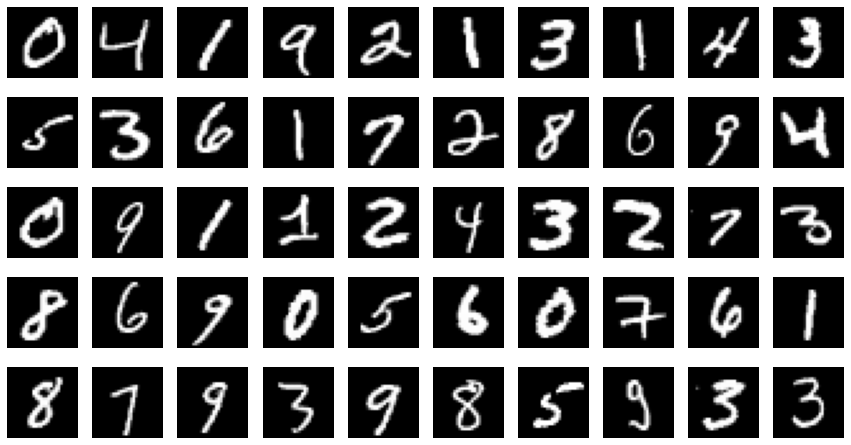

In [5]:
# print some samples for inspection
fig=plt.figure(figsize=(15, 8))
columns = 10
rows = 5
for i in range(1, columns*rows +1):
    img = x_train[i]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

# Data Preparation

In [6]:
# Feature Normalization 
x_train = x_train.astype('float32'); x_test = x_test.astype('float32')
x_train /= 255; x_test /= 255

In [7]:
# Convert labels to One Hot Encoded
num_digits = 10
y_train = tf.keras.utils.to_categorical(y_train, num_digits)
y_test = tf.keras.utils.to_categorical(y_test, num_digits)

# Train Model

In [8]:
# compare results
df = pd.DataFrame()
df['Label'] = np.argmax(y_test, axis=-1)

#### Model 1

In [9]:
# Input Parameters
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

lossf = tf.nn.softmax_cross_entropy_with_logits
model.compile(optimizer='adam', loss=lossf, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5635 - accuracy: 0.9010
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5183 - accuracy: 0.9427
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5143 - accuracy: 0.9467
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5113 - accuracy: 0.9498
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5144 - accuracy: 0.9465
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5159 - accuracy: 0.9452
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5239 - accuracy: 0.9372
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5216 - accuracy: 0.9395
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5150 - accuracy: 0.9461
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.525

In [10]:
# evaluate accuracy
df['Model1'] = np.argmax(model.predict(x_test), axis=-1)
loss, accuracy = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 1.5651 - accuracy: 0.8959


#### Model 2

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
lossf = tf.nn.softmax_cross_entropy_with_logits
model.compile(optimizer='adam', loss=lossf, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5621 - accuracy: 0.9094
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5108 - accuracy: 0.9527
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5005 - accuracy: 0.9622
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4936 - accuracy: 0.9685
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4903 - accuracy: 0.9717
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4872 - accuracy: 0.9744
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4857 - accuracy: 0.9758
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4837 - accuracy: 0.9780
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4817 - accuracy: 0.9799
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.481

# Predictions

In [27]:
hard_to_predict = df[df.apply(lambda x: min(x) != max(x), 1)].index
hard_to_predict = x_test[hard_to_predict]

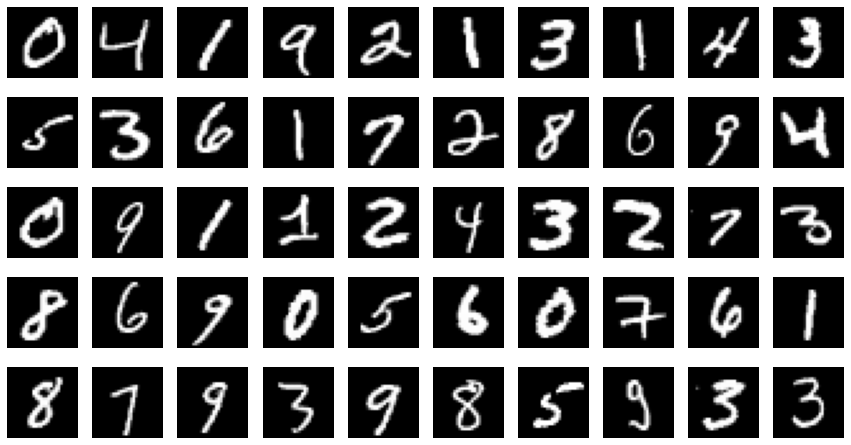

In [29]:
# print some samples for inspection
fig=plt.figure(figsize=(15, 8))
columns = 10
rows = 5
for i in range(1, columns*rows +1):
    img = x_train[i]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()